In [253]:
pip install scikit-learn

python(58366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [254]:
pip install seaborn

python(58367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [255]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
!pip install pandas pyarrow fastparquet

import pandas as pd

# Reading a Parquet file
df = pd.read_parquet('part-00000-tid-493948213598196477-d9c834c5-f165-4114-adea-8b3141604c18-416-1-c000.snappy.parquet', engine='pyarrow')  # or engine='fastparquet'

# Display the DataFrame
print(df.head())

python(58368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
   cust_id        date  age  gender         item  quantity       amount  \
0      198  2023-04-30   69    Male  Electronics         3  1515.699951   
1      389  2023-05-15   70  Female  Accessories         7  4051.139893   
2      216  2023-06-21   21    Male  Accessories         7   708.820007   
3      133  2023-10-09   59  Female     Clothing         7  3918.169922   
4      262  2023-11-09   62  Female      Grocery         2  4847.580078   

   discount  rating                        transaction_id    location  \
0      72.0       3  e3e70682-c209-4cac-a29f-6fbed82c07cd     Florida   
1       7.0       2  f728b4fa-4248-4e3a-8a5d-2f346baa9455  California   
2      77.0       1  eb1167b3-67a9-4378-bc65-c1e582e2e662  California   
3      99.0       4  e443df78-9558-467f-9ba9-1faf7a024204    New York   
4      91.0       5  23a7711a-8133-4876-b7eb-dcd9e87a1613     Florida   

 

In [257]:
# Round the values
df['amount'] = df['amount'].round()
df['amount'].head()

0    1516.0
1    4051.0
2     709.0
3    3918.0
4    4848.0
Name: amount, dtype: float32

In [258]:
df.describe()
# After analyzing the data seems to be in right format with no outliers

,cust_id,age,quantity,amount,discount,rating
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,196.414404,44.342385,5.480519,2545.197754,50.004723,2.997639
std,113.769269,15.260630,2.862559,1442.424438,29.695650,1.429168
min,1.000000,18.000000,1.000000,9.000000,0.000000,1.000000
25%,99.000000,31.000000,3.000000,1296.500000,24.000000,2.000000
50%,194.000000,44.000000,6.000000,2582.500000,51.000000,3.000000
75%,297.000000,57.000000,8.000000,3831.000000,77.000000,4.000000
max,400.000000,70.000000,10.000000,4999.000000,100.000000,5.000000


In [259]:
df.isnull().sum()
# No null data is detected 

cust_id           0
date              0
age               0
gender            0
item              0
quantity          0
amount            0
discount          0
rating            0
transaction_id    0
location          0
Source            0
dtype: int64

In [260]:
df.duplicated().sum()

0

In [261]:
# Detecting the outliers using the formula of IQR 
'''
q1 = df["quantity"].quantile(0.30)
q3 = df["quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["quantity"] < upper_limit) & (df["quantity"] > lower_limit)]
'''

'\nq1 = df["quantity"].quantile(0.30)\nq3 = df["quantity"].quantile(0.70)\niqr = q3 - q1\n\nupper_limit = q3 + (1.5 * iqr)\nlower_limit = q1 - (1.5 * iqr)\n\ndf = df.loc[(df["quantity"] < upper_limit) & (df["quantity"] > lower_limit)]\n'

In [262]:
'''
q1 = df["amount"].quantile(0.25)
q3 = df["amount"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["amount"] < upper_limit) & (df["amount"] > lower_limit)]
'''

'\nq1 = df["amount"].quantile(0.25)\nq3 = df["amount"].quantile(0.65)\niqr = q3 - q1\n\nupper_limit = q3 + (1.5 * iqr)\nlower_limit = q1 - (1.5 * iqr)\n\ndf = df.loc[(df["amount"] < upper_limit) & (df["amount"] > lower_limit)]\n'

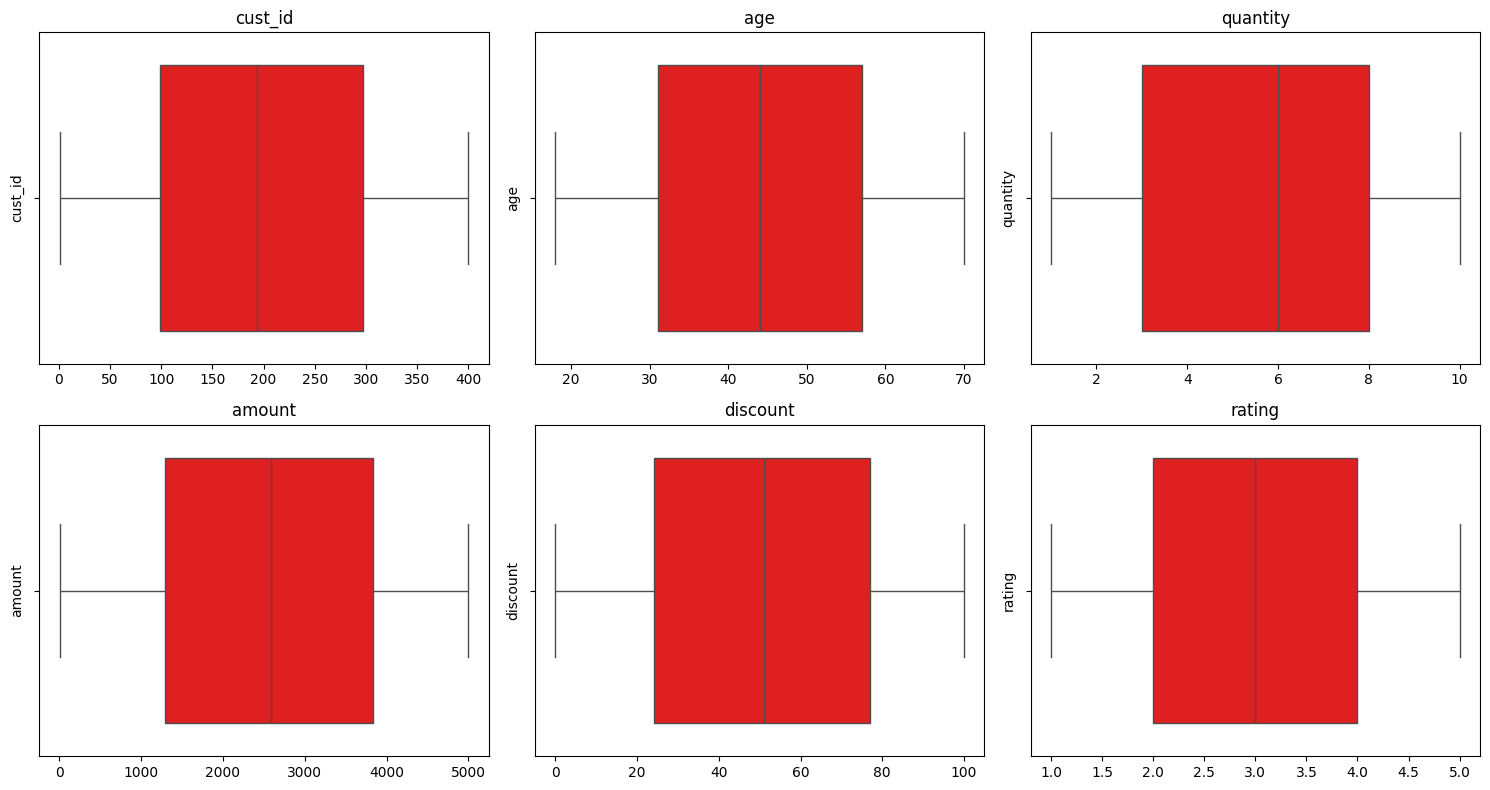

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = df.select_dtypes(include="number").columns

# Set the number of columns for subplots, adjust based on your requirements
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Iterate over numerical features and create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x=feature, color='red')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()

In [264]:
df.columns

Index(['cust_id', 'date', 'age', 'gender', 'item', 'quantity', 'amount',
       'discount', 'rating', 'transaction_id', 'location', 'Source'],
      dtype='object')

In [265]:
# Performing the feature engineering on column
df["total_price"] = df["quantity"] * df["amount"]*(1 - df["discount"] / 100)

/var/folders/cb/l26bd09142q4mljfwpnnsq5c0000gn/T/ipykernel_51840/2409775708.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


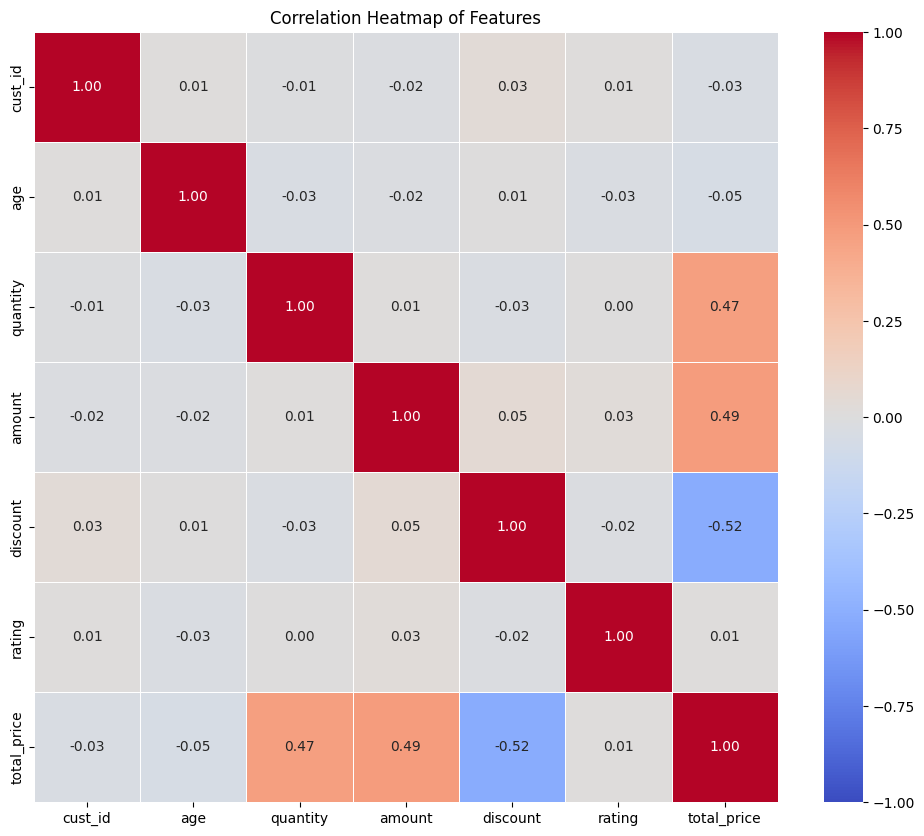

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the numerical features
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()


In [267]:
# Convert 'date' to datetime format and extract month and day of week as features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Encode categorical features like 'gender', 'item', and 'location'
df['gender'] = LabelEncoder().fit_transform(df['gender'])  # 0 for Male, 1 for Female
df = pd.get_dummies(df, columns=['item', 'location','Source'], drop_first=True)

features = df[['age', 'quantity', 'discount', 'rating', 'month', 'day_of_week', 'total_price']]



In [268]:
# Standardize the features using z score normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

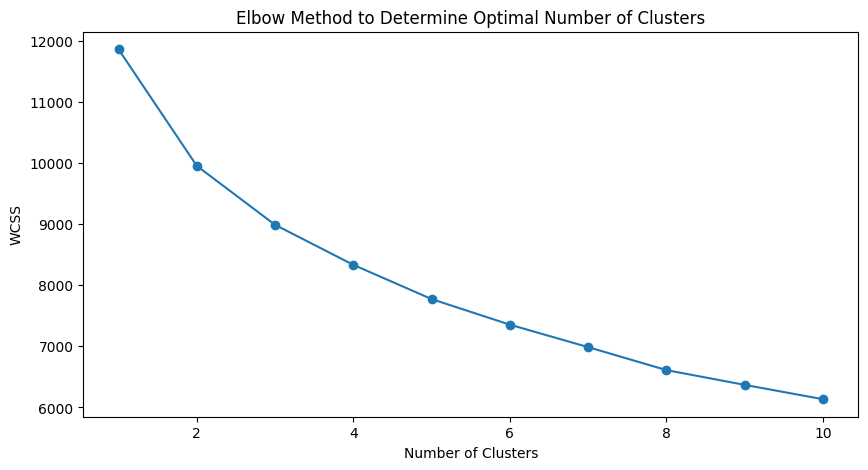

In [269]:
# Using the Elbow method to determine the optimal number of clusters
# Finding the point where there is abrupt change as value of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [270]:
# Fit K-means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


In [271]:
df.columns

Index(['cust_id', 'date', 'age', 'gender', 'quantity', 'amount', 'discount',
       'rating', 'transaction_id', 'total_price', 'month', 'day_of_week',
       'item_Clothing', 'item_Electronics', 'item_Grocery',
       'location_California', 'location_Florida', 'location_New York',
       'location_Texas', 'Source_Online Store', 'Source_Physical store',
       'cluster'],
      dtype='object')

/var/folders/cb/l26bd09142q4mljfwpnnsq5c0000gn/T/ipykernel_51840/1457894989.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('cluster').mean()


            cust_id        age    gender  quantity       amount   discount  \
cluster                                                                      
0        199.910876  45.892749  0.501511  4.862538  2411.131348  55.660122   
1        186.128415  41.994536  0.543716  7.939891  3276.450928  23.112022   
2        198.591592  44.091592  0.524024  4.743243  2276.599121  59.162163   

           rating   total_price     month  day_of_week  item_Clothing  \
cluster                                                                 
0        3.141994   4168.071556  3.489426     2.944109       0.265861   
1        2.964481  18849.125748  6.885246     2.792350       0.256831   
2        2.872372   3191.378354  9.390390     3.271772       0.256757   

         item_Electronics  item_Grocery  location_California  \
cluster                                                        
0                0.255287      0.219033             0.197885   
1                0.275956      0.240437            

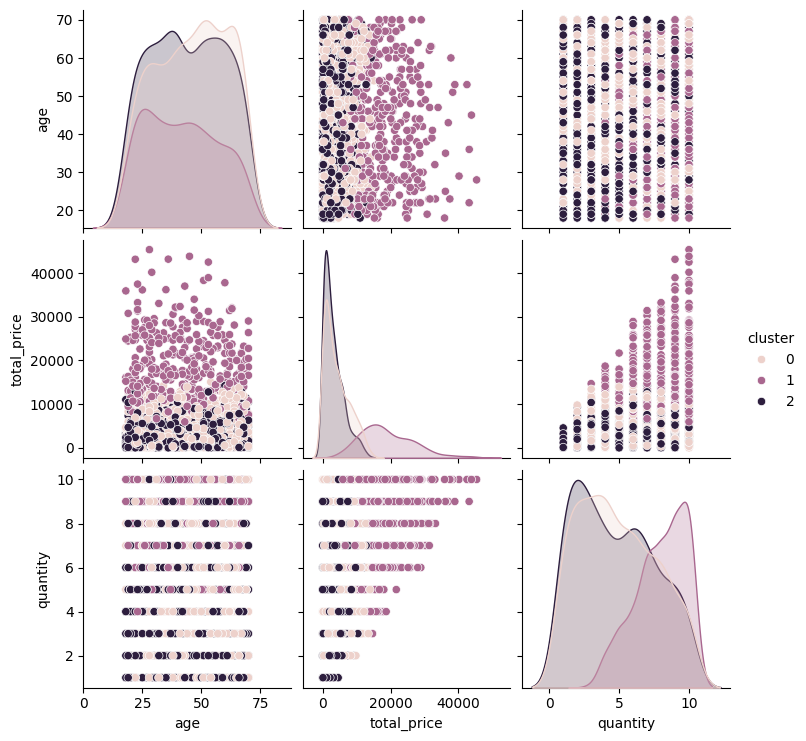

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster to analyze the characteristics of each segment
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

# Visualize clusters
sns.pairplot(df, hue='cluster', vars=['age', 'total_price', 'quantity'])
plt.show()


In [273]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Define target variable and features
# The target variable future_purchase is created to indicate whether a customer made a
# purchase in the last 30 days. It’s a binary variable: 1 for recent purchases, 0 otherwise.

df['future_purchase'] = np.where(df['date'] > df['date'].max() - pd.Timedelta(days=30), 1, 0)

# Drop non-numeric columns and the target variable
X = df.drop(['cust_id', 'transaction_id', 'date', 'future_purchase'], axis=1)
y = df['future_purchase']

# Check for categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Convert categorical columns to numeric if necessary
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
# It suggest how accurate model is 
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
# This indicates that when the model predicts a customer will make a purchase
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
# This means that the model correctly identify customers who will make purchase
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Matrix show when purchase was correctly predicted or not
print("Classification Report:\n", classification_report(y_test, y_pred))
# High performance of model highlight that it is effectively
# distinguishing between customers who will make a purchase and those who will not.

Categorical Columns: Index([], dtype='object')
Accuracy Score: 0.9988193624557261
Precision Score: 0.9988357601993966
Recall Score: 0.9988193624557261
Confusion Matrix:
 [[775   1]
 [  0  71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       776
           1       0.99      1.00      0.99        71

    accuracy                           1.00       847
   macro avg       0.99      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

